Go to directory: /Users/yunjunz/development/python/2018_ComputGeosci_PySAR/rms_outlier_detection


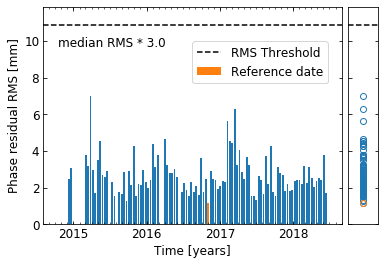

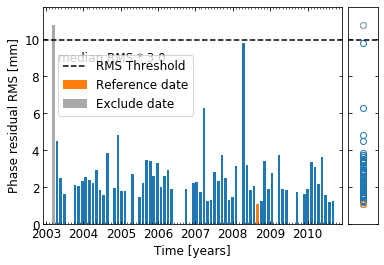

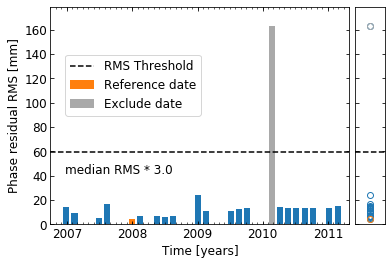

In [2]:
# Automatic outlier detection based on timeseries phase residual
# with standardised residual of Median Absolute Deviation
import os
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.robust import mad
from pysar.simulation.plot import *
from pysar.utils import ptime, utils as ut
import pysar.timeseries_rms as prms

work_dir = '/Users/yunjunz/development/python/2018_ComputGeosci_PySAR/rms_outlier_detection'
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)

for project_name, loc in zip(['AlcedoSenDT128', 'AlcedoEnvA2T061', 'AlcedoAlosAT133'],
                             [(0.5, 0.65), (0.05, 0.5), (0.05, 0.5)]):
    # read rms value
    txt_file = '/Users/yunjunz/insarlab/PYSAR_EXAMPLE/{}/PYSAR/rms_timeseriesResidual_quadratic.txt'.format(project_name)
    fcont = np.loadtxt(txt_file, dtype=bytes).astype(str)
    rms = fcont[:, 1].astype(np.float)
    date_list = list(fcont[:, 0])

    # calculate median absolute deviation
    rms_threshold = ut.median_abs_deviation_threshold(rms, center=0., cutoff=3.)
    #rms_threshold = np.median(rms) / .6745 * 3.
    
    # plot
    fig, ax = plt.subplots(figsize=[6, 4])
    ax = prms.plot_rms_bar(ax, date_list, rms, rms_threshold, legend_loc=loc)
    #plt.savefig('rms_phaseResidual_{}{}'.format(project_name, fig_ext), bbox_inches='tight', transparent=True, dpi=fig_dpi)

plt.show()